# Scrape google search results for a range of consutancy companies

## Consultancies include Deloitte, Mckinsey, KPMG, PwC, EY
## Others include US dept of labor, European Labour authority, Ministy of labor (UK), CSIRO

### How this will work

The idea is that the user will input some search term e.g. 'work' , 'death', 'accident' etc.
Some good keywords are emerging, future, trends

Using a google search using the keyword and the additional criteria site:mckinsey.com for exmaple

Output df will be Title, 

In [29]:
import requests
import bs4
from bs4 import BeautifulSoup
from PyPDF2 import PdfReader
import time


In [2]:
website_organisations = ['www.mckinsey.com', 'www.hse.gov.uk']#, 'www.pwc.com', 'assets.kpmg', 
                        #'assets.ey.com', 'www.oecd.org','www2.deloitte.com',
                        #'www.bls.gov','www.europarl.europa.eu','www.unido.org','www.who.int']

In [3]:
# search terms
search_terms = ['work', 'emerging+trends', 'emerging+technolog*']#,'disruptive+technolog', 'workplace+accident','workplace+incident',
        # 'workplace+death','workplace+safety', 'work+hazard', 'emerging+risk']


In [4]:
# Valid years

valid_years = ['2019', '2020', '2021', '2022']

In [5]:
year = str(2018)

if year in valid_years:
    print(year)

In [7]:
scraper_api_key = 'e0ee95da47b4346e9020592c7d6478a4'

In [ ]:
url = 'https://www.google.com/search?q={}:{}%202020%20filetype:pdf'.format(term,website)

In [46]:
count = 0
files_of_interest = []

#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}

for website in website_organisations:
    for term in search_terms:
        
        term = term.replace(' ','+')
        for year in valid_years:
            #text = text= term + ' site:'+ website + " " + year +' filetype:pdf'
            
            #url = 'https://google.com/search?q=' + text
            url = 'https://www.google.com/search?q={}:{}%202020%20filetype:pdf'.format(term,website)
            #print(url)

            # Fetch the URL data using requests.get(url),
            # store it in a variable, request_result.
            
            #request_result=requests.get( url, headers = headers )
            
            r = requests.post(url = 'https://async.scraperapi.com/jobs', json={ 'apiKey': scraper_api_key, 'url': url })
            print(r.text)

            # Creating soup from the fetched request
            soup = bs4.BeautifulSoup(request_result.text,"html.parser")
            soup = str(soup)
            
            if 'Our systems have detected unusual traffic from your computer network' in soup:
                print('Run into limit. Wait 5 mins')
                
            else:
            
                soup = soup[soup.find('a href="/url?q='):]

                split_res = (soup.split('a href="/url?q='))

                for split in split_res:
                    #date = "unknown"
                    print(split)
                    # see if split is too short or caontains useless links
                    if len(split) < 10 or 'google.com' in split :
                        pass
                    else:
                        if '2018' in split or '2019' in split or '2020' in split or '2021' in split or '2022' in split:
                            output = split[:split.find("&amp;")].replace('2520','20') # weird formatting
                            files_of_interest.append(files_of_interest)


                time.sleep(5)

                count+=1

print(count)       
files_of_interest

<html>
<head><title>503 Service Temporarily Unavailable</title></head>
<body>
<center><h1>503 Service Temporarily Unavailable</h1></center>
<hr><center>nginx</center>
</body>
</html>

Run into limit. Wait 5 mins


KeyboardInterrupt: 

In [ ]:
print(files_of_interest)

In [ ]:
for file in files_of_interest:
    url = file
    content = requests.get(url).content
    filename = "C:/Users/Declan/Desktop/downloaded_pdfs/" +url.split('/')[-1].replace('.ashx','.pdf')
    
    with open(filename, 'wb') as f:
        f.write(content)
        f.close
    

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>work inside site:mckinsey.com filetype:pdf - Google Search</title><script nonce="qdC2n2fMR9uY1uxruYqtoQ">(function(){
var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'J0tDY-TZCqC84-EPkqC3wAY',kEXPI:'31',kBL:'W-mA'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.sea
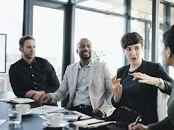
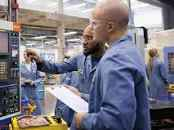
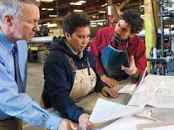
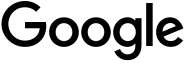

In [47]:
#import requests
#payload = {'api_key': scraper_api_key, 'country_code': 'us', 'url':'https://www.google.com/search?q=work+inside+site%3Amckinsey.com+filetype%3Apdf&rlz=1C1CHBF_en-GBSG896SG896&biw=1280&bih=625&sxsrf=ALiCzsY54vvrQnVnHJi13OheK4OnQDOlIw%3A1665350375475&ei=5zpDY4TRHNTe4-EP2Mma2A0&ved=0ahUKEwjE4LnMidT6AhVU7zgGHdikBtsQ4dUDCA4&uact=5&oq=work+inside+site%3Amckinsey.com+filetype%3Apdf&gs_lcp=Cgdnd3Mtd2l6EANKBAhBGAFKBAhGGABQgwZYgwZg6gdoAXAAeACAAZABiAGQAZIBAzAuMZgBAKABAcABAQ&sclient=gws-wiz', 'render': 'true'}
#r = requests.get('http://api.scraperapi.com', params=payload)
#print(r.text)

# Scrapy users can simply replace the urls in their start_urls and parse function
# ...other scrapy setup code
#start_urls = ['http://api.scraperapi.com?api_key=APIKEY&url=' + url +'&render=true']
#def parse(self, response):
  # ...your parsing logic here
#  yield scrapy.Request('http://api.scraperapi.com/?api_key=APIKEY&url=' + url +'&render=true', self.parse)
    
#a= parse
#print(a)

## Testing scraperapi

In [53]:
import requests
payload = {'api_key': scraper_api_key, 'country_code': 'us','url': 'https://www.google.com/search?q=work+inside+site%3Amckinsey.com+filetype%3Apdf&rlz=1C1CHBF_en-GBSG896SG896&biw=1280&bih=625&sxsrf=ALiCzsY54vvrQnVnHJi13OheK4OnQDOlIw%3A1665350375475&ei=5zpDY4TRHNTe4-EP2Mma2A0&ved=0ahUKEwjE4LnMidT6AhVU7zgGHdikBtsQ4dUDCA4&uact=5&oq=work+inside+site%3Amckinsey.com+filetype%3Apdf&gs_lcp=Cgdnd3Mtd2l6EANKBAhBGAFKBAhGGABQgwZYgwZg6gdoAXAAeACAAZABiAGQAZIBAzAuMZgBAKABAcABAQ&sclient=gws-wiz'}
print(payload)
html = requests.get('http://api.scraperapi.com', params=payload)

{'api_key': 'e0ee95da47b4346e9020592c7d6478a4', 'country_code': 'us', 'url': 'https://www.google.com/search?q=work+inside+site%3Amckinsey.com+filetype%3Apdf&rlz=1C1CHBF_en-GBSG896SG896&biw=1280&bih=625&sxsrf=ALiCzsY54vvrQnVnHJi13OheK4OnQDOlIw%3A1665350375475&ei=5zpDY4TRHNTe4-EP2Mma2A0&ved=0ahUKEwjE4LnMidT6AhVU7zgGHdikBtsQ4dUDCA4&uact=5&oq=work+inside+site%3Amckinsey.com+filetype%3Apdf&gs_lcp=Cgdnd3Mtd2l6EANKBAhBGAFKBAhGGABQgwZYgwZg6gdoAXAAeACAAZABiAGQAZIBAzAuMZgBAKABAcABAQ&sclient=gws-wiz'}


In [54]:
soup1 = str(soup)
soup1 = soup1[soup1.find('"https://www.mckinsey.com'):]
soup1_split = soup1.split('https://')

In [55]:
soup1 = str(soup)

In [52]:
soup1

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n\n<html>\n<head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="initial-scale=1" name="viewport"/><title>https://google.com/search?q=work%20site:www.mckinsey.com%202020%20filetype:pdf</title></head>\n<body onload="e=document.getElementById(\'captcha\');if(e){e.focus();} if(solveSimpleChallenge) {solveSimpleChallenge(,);}" style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px;">\n<div style="max-width:400px;">\n<hr noshade="" size="1" style="color:#ccc; background-color:#ccc;"/><br/>\n<form action="index" id="captcha-form" method="post">\n<noscript>\n<div style="font-size:13px;">\n  In order to continue, please enable javascript on your web browser.\n</div>\n</noscript>\n<script async="" defer="" src="https://www.google.com/recaptcha/api.js"></script>\n<script>var submitCallback = function(response) {document.getElementById(\'captcha-for

In [50]:
soup1_split[1]

IndexError: list index out of range